# **Police Shooting Analysis**

Undoubtedly, our country’s racist past remains as present as ever in every realm of society one can imagine, especially with respect to law enforcement, which should come as no surprise given that the origins of policing in the US stem from slave patrolling (Spruill, 2016, p. 43). But what should come as a surprise is the fact that only the actors have changed, while the roles have largely remained the same. For example, during the protests in Ferguson, Missouri over the slaying of Michael Brown by police, crowds of African Americans in Ferguson were subjected to K-9 units, mirroring the use of bloodhounds to hunt slaves from the colonial era to the Civil War (Spruill, 2016, p.44 – 45). And yet, racism is not limited to the domain of policing alone. That is, policing is just one domain of our society and one symptom of racism. Racism, in other words, is a problem that still pervades every domain of our society. For example, research shows that African Americans college graduates experience higher unemployment than white college graduates (Weller, 2019, p. 3) and earn significantly less compared to white workers in identical jobs (Weller, 2019, p. 6). There is also a multitude of evidence that illustrates that African Americans still have separate and unequal access to education despite the legal end to race-based segregation in schooling decades ago (Logan et al., 2012, p. 9). Not surprisingly, there is also research that shows that there is juridical racism as well. Not only are African Americans more likely to be arrested, but they are also more likely to receive harsher sentences than white people who commit similar crimes (Schmitt et al., 2017, p. 6). We need look no further than Breonna Taylor’s case and the many others that have ended in private settlements to verify the reality. 

The motivation for the following analysis is not only the blatant reality of racism and the preponderance of literature that attests to its reality, but also the fact that current research implies that racism is not manifested in police shootings. That is, while I did find research that showed that black people are stopped/targeted by the police more than white people (Cooley et al, 2020, p. 764-766) and even that they are killed disproportionately (Menifield et al, 2018, p.64-68), to my surprise, the majority of the research I came across relating to police shootings suggested that white police officers are no more likely to kill or shoot black people than they are to shoot or kill white people (R. Lott Jr., 2016, p.14-17). Consequently, I wanted to undertake this study to answer questions such as: Do white police officers shoot/kill more black/latino people than white people? Do police officers in general tend to fire more shots at black and latino people?

The objective of the following analysis is to:

(1) Determine whether data on policing can be used to verify the problem of systemic racism in the domain of policing specifically.
(2) (If possible) Identify the ways in which Black/Latino people in the US are unequally treated by the police

The dataset used in this analysis was obtained from VICE News. It consists of data on fatal and non-fatal police shootings from 2010 to 2016 from the 50 largest police departments in the U.S. I chose this data set in particular because, in addition to containing data on the race of the victims of shootings, it contains data on the race and gender of the officers, and I felt this was pertinent to attempting to answer the aforementioned questions. However, the dataset does have some limitations that must be addressed at the ouset of this analysis. As a result of limiting itself to the largest police departments in the US, the dataset is inherently biased since it is not really representative of the US as a whole but merely of major metropolitan cities in the U.S. That said, useful insights can still be drawn from the data, though with a grain of caution. 

The variables in this data set were primarily categorical, but some were quantitative or numerical as well. The variables in the data set were the race and gender of the victims and officers, the number of officers, the number of shots fired by officers, the type of shooting (i.e. whether it was fatal or non-fatal), the status of the suspect (i.e. whether the suspect was armed or not), the age of the suspect, the police department, city, date, and the nature of the stop. 

In [5]:
# Import relevant libraries
import matplotlib.pyplot as plt
import random as rand
import seaborn as sns
import pandas as pd
import numpy as np
import os
import re
import regex as reg

In [83]:
# Get working directory and change directory
os.getcwd()
os.chdir("/Users/hudsonfinchbatista/Desktop/Python Datasets")
# Read data into variable data1 and create pandas dataframe
data = pd.read_csv("police_fatalities.csv", na_values = ['NAME?'])
data = pd.DataFrame(data)
# Get length/number of rows of dataframe
print(len(data))

4400


In [84]:
# Observe struture of dataframe
print(type(data));print("\n")

print(data.columns)

for i in data.columns:
    print(type(i))

<class 'pandas.core.frame.DataFrame'>


Index(['Date', 'NumberOfSubjects', 'Fatal', 'SubjectArmed', 'SubjectRace',
       'SubjectGender', 'SubjectAge', 'NatureOfStop', 'NumberOfShots',
       'NumberOfOfficers', 'OfficerRace', 'OfficerGender', 'Department',
       'FullNarrative', 'City', 'Notes'],
      dtype='object')
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [85]:
# Observe head of dataframe
data.head()

,Date,NumberOfSubjects,Fatal,SubjectArmed,SubjectRace,SubjectGender,SubjectAge,NatureOfStop,NumberOfShots,NumberOfOfficers,OfficerRace,OfficerGender,Department,FullNarrative,City,Notes
0,3/4/2010,1,N,N,L,U,U,NaN,NaN,1,W,M,Albuquerque Police Department,NaN,Albuquerque,motorized vehicle; no hits
1,1/9/2010,1,F,Y,W,M,U,NaN,NaN,1,W,M,Albuquerque Police Department,NaN,Albuquerque,NaN
2,6/10/2010,1,F,Y,W,M,U,NaN,NaN,2,W;W,M;M,Albuquerque Police Department,NaN,Albuquerque,NaN
3,11/10/2010,1,N,Y,U,M,U,NaN,NaN,1,W,M,Albuquerque Police Department,NaN,Albuquerque,NaN
4,11/11/2010,1,N,Y,L,M,U,NaN,NaN,1,W,M,Albuquerque Police Department,NaN,Albuquerque,NaN


In [86]:
# Count number of nan values in NumberOfShots and NumberOfOfficers Columns
print(data['NumberOfShots'].isnull().sum())
print(data['NumberOfOfficers'].isnull().sum())

3140
538


# Data Cleaning

In [87]:
# Replace all superfluous punctuation from NumberOfOfficers Variable
data1 = data

data1.NumberOfOfficers = data1.NumberOfOfficers.str.replace(">","")
data1 = data1[~(data1.NumberOfOfficers.str.contains("U") | data1.NumberOfOfficers.str.contains("2 or More"))]

# Change NumberOfOfficers to numeric variable
data1.NumberOfOfficers = pd.to_numeric(data1.NumberOfOfficers)

# Check new length of dataset observations
print(len(data1))

4392


/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [88]:
# Find the most common abbreviations for races
new_df = pd.DataFrame(pd.value_counts(data1.OfficerRace))
print((data1.OfficerRace.dtypes))
new_df.head(10)

object


,OfficerRace
U,1269
W,894
B,320
L,220
W;W,205
H,200
A,46
B;B,44
W;W;W,44
H;H,38


In [89]:
# Create new columns/variables that count the number of officers by race

data1['OfficerRace']=data1['OfficerRace'].apply(str)

for i,rowseries in data1.iterrows():
        data1.at[i,'AsianOfficers'] = len([*re.finditer(r'A',data1.at[i,'OfficerRace'])])
        data1.at[i,'BlackOfficers'] = len([*re.finditer(r'B',data1.at[i,'OfficerRace'])])
        data1.at[i,'LatinoOfficers'] = len([*re.finditer(r'L|H',data1.at[i,'OfficerRace'])])
        data1.at[i,'WhiteOfficers'] = len([*re.finditer(r'W',data1.at[i,'OfficerRace'])])
        data1.at[i,'NativeAmericanOfficers'] = len([*re.finditer(r'AI/AN',data1.at[i,'OfficerRace'])])
        data1.at[i,'OtherOfficers'] = len([*re.finditer(r'O',data1.at[i,'OfficerRace'])])
        data1.at[i,'UnknownOfficers'] = len([*re.finditer(r'U',data1.at[i,'OfficerRace'])])

<ipython-input-89-6ee4aee8a5c6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['OfficerRace']=data1['OfficerRace'].apply(str)
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [90]:
# Create new columns/variables to count the number of officers by gender

data1['OfficerGender']=data1['OfficerGender'].apply(str)

for i,rowseries in data1.iterrows():
        data1.at[i,'MaleOfficers'] = len([*re.finditer(r'M',data1.at[i,'OfficerGender'])])
        data1.at[i,'FemaleOfficers'] = len([*re.finditer(r'F',data1.at[i,'OfficerGender'])])

<ipython-input-90-9ac20467bf78>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['OfficerGender']=data1['OfficerGender'].apply(str)


In [91]:
# Create factor/dichotomous variable for majority White or majority Non-White officers
for i,rowseries in data1.iterrows():
    if (data1.at[i,'WhiteOfficers'] > data1.at[i,'BlackOfficers']) & (data1.at[i,'WhiteOfficers'] > data1.at[i,'LatinoOfficers']):
        data1.at[i,"OfficerRace2"] = "White"
    else:
        data1.at[i,"OfficerRace2"] = "Non-White"

In [92]:
# Create factor/dichotomous variable for majority Male or majority Male officers
for i,rowseries in data1.iterrows():
    if (data1.at[i,'MaleOfficers'] > data1.at[i,'FemaleOfficers']):
        data1.at[i,"OfficerGender2"] = "Male"
    else:
        data1.at[i,"OfficerGender2"] = "Female"

In [93]:
# Filter dataframe to only show fatalities and non-fatalities
data1 = data1[(data1.Fatal.str.contains("F") | data1.Fatal.str.contains("N"))]
data1.head()

,Date,NumberOfSubjects,Fatal,SubjectArmed,SubjectRace,SubjectGender,SubjectAge,NatureOfStop,NumberOfShots,NumberOfOfficers,...,BlackOfficers,LatinoOfficers,WhiteOfficers,NativeAmericanOfficers,OtherOfficers,UnknownOfficers,MaleOfficers,FemaleOfficers,OfficerRace2,OfficerGender2
0,3/4/2010,1,N,N,L,U,U,NaN,NaN,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,White,Male
1,1/9/2010,1,F,Y,W,M,U,NaN,NaN,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,White,Male
2,6/10/2010,1,F,Y,W,M,U,NaN,NaN,2.0,...,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,White,Male
3,11/10/2010,1,N,Y,U,M,U,NaN,NaN,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,White,Male
4,11/11/2010,1,N,Y,L,M,U,NaN,NaN,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,White,Male


In [94]:
# Remove single misentry
data1.SubjectGender = data1.SubjectGender.str.replace(";U","")
data1.SubjectGender.value_counts()

M    2822
U    1190
F      91
Name: SubjectGender, dtype: int64

In [95]:
# Select columns/variables of interest
data2 = data1[['NatureOfStop','Fatal','SubjectArmed','SubjectRace','SubjectGender','SubjectAge','NumberOfOfficers','OfficerRace2','OfficerGender2','NumberOfShots']]
print(len(data2))
data2.head()

4105


,NatureOfStop,Fatal,SubjectArmed,SubjectRace,SubjectGender,SubjectAge,NumberOfOfficers,OfficerRace2,OfficerGender2,NumberOfShots
0,NaN,N,N,L,U,U,1.0,White,Male,NaN
1,NaN,F,Y,W,M,U,1.0,White,Male,NaN
2,NaN,F,Y,W,M,U,2.0,White,Male,NaN
3,NaN,N,Y,U,M,U,1.0,White,Male,NaN
4,NaN,N,Y,L,M,U,1.0,White,Male,NaN


In [96]:
# Get rid of whitespaces in Fatal column

data2.Fatal = data2.Fatal.str.replace(" ","")

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [97]:
# Filter SubjectAge column so that it can be converted into an integer
data_age = data2[~(data2.SubjectAge.str.contains("U") | data2.SubjectAge.str.contains("UNKNOWN") |
                data2.SubjectAge.str.contains("Juvenile") | data2.SubjectAge.str.contains("N/A"))]



In [98]:
# Create random ages for ages with date ranges

for i,row_series in data_age.iterrows():
    if data_age.at[i,'SubjectAge'] == "0-19":
        data_age.at[i,'SubjectAge'] = rand.randint(0,24)
    elif data_age.at[i,'SubjectAge'] == "21-23":
        data_age.at[i,'SubjectAge'] = rand.randint(21,24)
    elif data_age.at[i,'SubjectAge'] == "20-29":
        data_age.at[i,'SubjectAge'] = rand.randint(20,30)
    elif data_age.at[i,'SubjectAge'] == "30-39":
        data_age.at[i,'SubjectAge'] = rand.randint(30,40)
    elif data_age.at[i,'SubjectAge'] == "40-49":
        data_age.at[i,'SubjectAge'] = rand.randint(40,50)
    elif data_age.at[i,'SubjectAge'] == "50-59":
        data_age.at[i,'SubjectAge'] = rand.randint(50,60)
    elif data_age.at[i,'SubjectAge'] == "60-69":
        data_age.at[i,'SubjectAge'] = rand.randint(60,69)
    else:
        data_age.at[i,'SubjectAge'] = pd.to_numeric(data_age.at[i,'SubjectAge'])

print(len(data_age))
data_age.SubjectAge = pd.to_numeric(data_age.SubjectAge)

2002


In [99]:
# Replace unnecessary punctuation from NumberOfShots columns and
# Create dataset with data on number of shots

data_shots = data2

data_shots.NumberOfShots = data_shots.NumberOfShots.str.replace(">/=","")
data_shots.NumberOfShots = data_shots.NumberOfShots.str.replace(">","")
data_shots.NumberOfShots = data_shots.NumberOfShots.str.replace("*","")
data_shots.NumberOfShots = data_shots.NumberOfShots.str.replace(" total","")
data_shots.NumberOfShots = data_shots.NumberOfShots.str.replace(" ","")

data_shots1 = data_shots[~(data_shots.NumberOfShots.str.contains("U") | data_shots.NumberOfShots.str.contains("notclear") | 
                data_shots.NumberOfShots.str.contains("noinformation") | data_shots.NumberOfShots.str.contains("Multiple") |
                         data_shots.NumberOfShots.str.contains("-") | data_shots.NumberOfShots.str.contains(";"))]


In [100]:
# Create dataset based on number of shots and age

data_shots_age = data_age

data_shots_age.NumberOfShots = data_shots_age.NumberOfShots.str.replace(">/=","")
data_shots_age.NumberOfShots = data_shots_age.NumberOfShots.str.replace(">","")
data_shots_age.NumberOfShots = data_shots_age.NumberOfShots.str.replace("*","")
data_shots_age.NumberOfShots = data_shots_age.NumberOfShots.str.replace(" total","")
data_shots_age.NumberOfShots = data_shots_age.NumberOfShots.str.replace(" ","")

data_shots_age1 = data_shots_age[~(data_shots_age.NumberOfShots.str.contains("U") | data_shots_age.NumberOfShots.str.contains("notclear") | 
                data_shots_age.NumberOfShots.str.contains("noinformation") | data_shots_age.NumberOfShots.str.contains("Multiple") |
                         data_shots_age.NumberOfShots.str.contains("-") | data_shots_age.NumberOfShots.str.contains(";"))]

In [101]:
print(len(data_shots_age1))
print(len(data_shots1))

1913
3982


In [102]:
data_shots1.NumberOfShots.value_counts()
data_shots1.NumberOfShots = pd.to_numeric(data_shots1.NumberOfShots)

In [103]:
data_shots1.SubjectArmed = data_shots1.SubjectArmed.str.replace(" ","")

In [104]:
data_age.SubjectArmed = data_age.SubjectArmed.str.replace(" ","")

In [105]:
# Create two new datasets, one with fatalities only and the other with non-fatalities only
died = data_age[data_age.Fatal == "F"]
survived = data_age[data_age.Fatal == "N"]

In [106]:
# Create two new datasets, one with fatalities only and the other with non-fatalities only
died_shots = data_shots1[data_shots1.Fatal == "F"]
survived_shots = data_shots1[data_shots1.Fatal == "N"]

In [107]:
data_rand = data2

In [108]:
data_rand.NumberOfShots = data_rand.NumberOfShots.str.replace(">/=","")
data_rand.NumberOfShots = data_rand.NumberOfShots.str.replace(">","")
data_rand.NumberOfShots = data_rand.NumberOfShots.str.replace("*","")
data_rand.NumberOfShots = data_rand.NumberOfShots.str.replace(" total","")
data_rand.NumberOfShots = data_rand.NumberOfShots.str.replace(" ","")

In [109]:
data_rand.loc[data_rand['NumberOfShots'].isnull(),'value_is_NaN'] = 'Yes'
data_rand.loc[data_rand['NumberOfShots'].notnull(), 'value_is_NaN'] = 'No'

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [110]:
list1 = ["M", "F"] 
list2 = ["L","B","A","W"]

for i, rowseries in data_rand.iterrows():
    if data_rand.at[i,'SubjectGender'] == ('U'):
        data_rand.at[i,'SubjectGender'] = rand.choice(list1)
    if data_rand.at[i,'SubjectRace'] == ('U'):
        data_rand.at[i,'SubjectRace'] = rand.choice(list2)
    if data_rand.at[i,'SubjectAge'] == ('U'):
        data_rand.at[i,'SubjectAge'] = rand.randint(10,70)

In [111]:
for i, rowseries in data_rand.iterrows():
    if data_rand.at[i,'value_is_NaN'] == ('Yes'):
        data_rand.at[i,'NumberOfShots'] = rand.randint(1,30)

In [113]:
data_rand = data_rand[~( data_rand.SubjectAge.str.contains("UNKNOWN") | data_rand.SubjectAge.str.contains("Juvenile") | 
                        data_rand.SubjectAge.str.contains("N/A"))]

In [114]:
# Create random ages for ages with date ranges

for i,row_series in data_rand.iterrows():
    if data_rand.at[i,'SubjectAge'] == "0-19":
        data_rand.at[i,'SubjectAge'] = rand.randint(0,24)
    elif data_rand.at[i,'SubjectAge'] == "21-23":
        data_rand.at[i,'SubjectAge'] = rand.randint(21,24)
    elif data_rand.at[i,'SubjectAge'] == "20-29":
        data_rand.at[i,'SubjectAge'] = rand.randint(20,30)
    elif data_rand.at[i,'SubjectAge'] == "30-39":
        data_rand.at[i,'SubjectAge'] = rand.randint(30,40)
    elif data_rand.at[i,'SubjectAge'] == "40-49":
        data_rand.at[i,'SubjectAge'] = rand.randint(40,50)
    elif data_rand.at[i,'SubjectAge'] == "50-59":
        data_rand.at[i,'SubjectAge'] = rand.randint(50,60)
    elif data_rand.at[i,'SubjectAge'] == "60-69":
        data_rand.at[i,'SubjectAge'] = rand.randint(60,69)
    else:
        data_rand.at[i,'SubjectAge'] = pd.to_numeric(data_rand.at[i,'SubjectAge'])

print(len(data_rand))
data_rand.SubjectAge = pd.to_numeric(data_rand.SubjectAge)

4097


In [115]:
data_rand.SubjectArmed = data_rand.SubjectArmed.str.replace(" ","")

In [116]:
list3 = ["Y", "N"]

for i, rowseries in data_rand.iterrows():
    if data_rand.at[i,'SubjectArmed'] == ('U'):
        data_rand.at[i,'SubjectArmed'] = rand.choice(list3)

In [117]:
# Replace unnecessary punctuation from NumberOfShots columns and
# Create dataset with data on number of shots

data_rand = data_rand[~(data_rand.NumberOfShots.str.contains("notclear") | 
                data_rand.NumberOfShots.str.contains("noinformation") | data_rand.NumberOfShots.str.contains("Multiple") |
                         data_rand.NumberOfShots.str.contains("-") | data_rand.NumberOfShots.str.contains(";"))]


In [118]:
data_rand = data_rand[~(data_rand.NumberOfShots.str.contains("U") | 
                data_rand.NumberOfShots.str.contains("Unknown"))]

In [120]:
data_rand.isnull().sum()

NatureOfStop        2538
Fatal                  0
SubjectArmed         462
SubjectRace            1
SubjectGender          2
SubjectAge             3
NumberOfOfficers     389
OfficerRace2           0
OfficerGender2         0
NumberOfShots          0
value_is_NaN           0
dtype: int64

## Summary of Data Cleaning

There was a substantial amount of cleaning necessary before emabarking upon the data exploration phase of the analysis. Multiple variables had a number of formatting issues and irregularities. The NumberOfShots variable in particular had an extremeley high proportion of nan values as well as a number of unnecessary punctuation that had to be removed. Additionally, the NumberOfOfficers variable contained a lot of unncessary punctuation that had to be removed and non-uniform data that had to be omitted. Similarly, the SubjectAge variable had unknown values, NA's, labels that were too general (e.g. "Juvenile"), and age ranges. As a way to get around the issue of so many date ranges for ages specifically, I decided to take a random sample of a number in the age range for a given observation with an age range rather than an age. Another one of the key variables of interest, OfficerRace, was highly interesting but the format was such that it was very difficult to use at it was. It gave the race of each officer involved in a given shooting, but it did so in the same column. As a result, I created new columns to count the number of officers of each race and recorded the number of officers of each race accordingly. As a way to capture and potentially use this information, I then created a new OfficerRace variable that was dichotomous. The value, White, indicated observations where the number of White officers exceeded the number of non-White officers and the value non-White indicated observations where the number of non-White officers exceeded the number of White officers. I performed an analogous procedure for the OfficerGender variable, which gave the gender of each officer involved in a given shooting, but it did so in the same column as well. So, likewise, I created new columns to count the number of officers of each gender and recorded the number of officers of each gender accordingly. I then created a new OfficerGender variable that was dichotomous. The value, Male, indicated observations where the number of Male officers exceeded the number of Female officers and the value Female indicated observations where the number of Female officers exceeded the number of Male officers. 

Due to the fact that so many values in the dataset were missing, unknown, or non-uniform, multiple dataframes had to be created. 

In order to preserve the majority of data, I had to resolve the issue of the large amount of nan and unknown values. Therefore, for one of the dataframes, called data_rand, I decided to randomly sample values for the binary categorical variables as well as the numerical variables. For instance, for the variable SubjectGender, for which there was a large amount of U values, I substituted in either an M or F value by randomly sampling them. I did the same with the NumberOfShots variable but rather than sampling any number, I set the limits between 1 and 20. I used a similar technique for missing age values as well. In other words, I was trying to generate noise that would allow me to undertake the proposed analysis without having to depend on a miniscule number of observations and jeopardize the insights from either the EDA or the modeling. That is, this method allowed me to not have to make a trade-off between certain variables at the expense of other. The only drawback of this method was that the dataset had to substantially manipulated and this might've been done at the expense of the actual data. That is, by randomly sampling values in place of missing values, the inherent characertistics and patterns in the dataframe were potentially comprimised. 

Since the primary variables of interest in addition to the number of officers variable were the number of shots and age variables, bot of which were missing lots of data, I decided to make three dataframes: 

1. data_shots1, which contained data for which shot values existed
2. data_age, which contained data for which age values existed
3. data_shots_age1, which contained data for which age and shots values existed

The age data and number of shots data were segregated to minimize the possibility of losing age data at the expense of number of shots data and vice versa. The idea behind creating multiple dataframes for shots and age data was to able to produce rich exploratory data analysis without compensating for any one variable's lack of values. The age and number of shots dataframes were then used as the bases for two new dataframes, died and survived, the former of which contains data on victims that died and the latter of which contains data on victims that survived. The dataframe called data2 was the fundamental dataframe, in a sense, since it had 4000 or so observations (i.e. majority of the observations) and merely entailed basic cleaning and variable creation. For instance, it included these two new variables (OfficerGender2 and OfficerRace2) and was the basis for the data_shots1 and data_age datasets. Wherever possible in EDA, the data2 dataset was used to ensure the majority of the data was being used when applicable. For data analysis solely involving number of shots, the data_shots1 dataframe was used and for data analysis solely involving age data, the data_age dataframe was used.  


# Exploratory Data Analysis

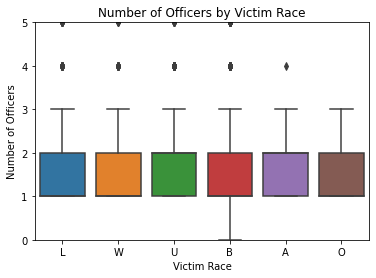

In [609]:
# Side-by-Side Boxplot of Number of Officers by Victim Race

b1 = sns.boxplot(data = data2,
                 x = 'SubjectRace',
                 y = 'NumberOfOfficers')

plt.title('Number of Officers by Victim Race')
plt.ylabel('Number of Officers')
plt.xlabel('Victim Race')
b1.set_ylim([0, 5])

plt.show()

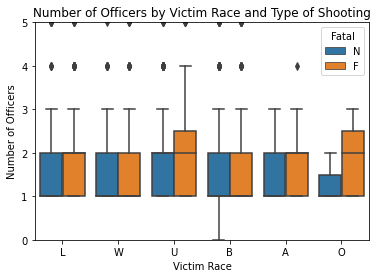

In [608]:
# Side-by-Side Boxplot of Number of Officers by Victim Race and Type of Shooting

b2 = sns.boxplot(data = data2,
                 hue = 'Fatal',
                 x = 'SubjectRace',
                 y = 'NumberOfOfficers')

plt.title('Number of Officers by Victim Race and Type of Shooting')
plt.ylabel('Number of Officers')
plt.xlabel('Victim Race')
b2.set_ylim([0, 5])

plt.show()

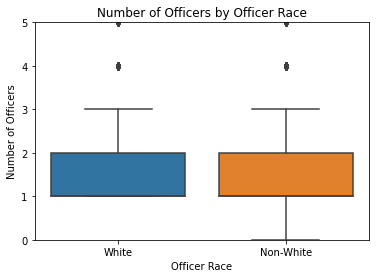

In [610]:
# Side-by-Side Boxplot of Number Of Officers by Officer Race

b3 = sns.boxplot(data = data2,
                 x = 'OfficerRace2',
                 y = 'NumberOfOfficers')

plt.title('Number of Officers by Officer Race')
plt.ylabel('Number of Officers')
plt.xlabel('Officer Race')

b3.set_ylim([0, 5])

plt.show()


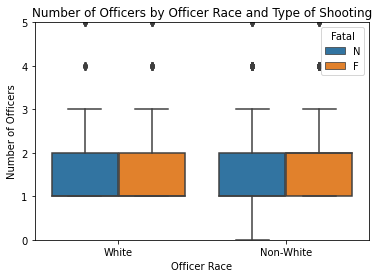

In [611]:
# Side-by-Side Boxplot of Number of Officers by Officer Race and Type of Shooting

b4 = sns.boxplot(data = data2,
                 hue = 'Fatal',
                 x = 'OfficerRace2',
                 y = 'NumberOfOfficers')

plt.title('Number of Officers by Officer Race and Type of Shooting')
plt.ylabel('Number of Officers')
plt.xlabel('Officer Race')

b4.set_ylim([0, 5])

plt.show()

            count unique       top freq
SubjectRace                            
A               3      3         7    1
B             149     37         1   33
L              65     25  notclear   12
O               0      0       NaN  NaN
U              40     16         2    8
W             117     27         1   21
            count unique  top freq
SubjectRace                       
A               5      4    1    2
B             280     38    1   90
L              93     18    1   34
O               0      0  NaN  NaN
U              28      9    1   14
W              77     21    1   19


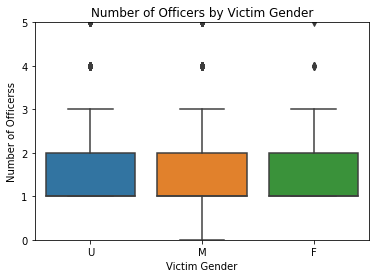

In [612]:
# Side-by-Side Boxplot of Number Of Officers by Victim Gender 

print(died1["NumberOfShots"].describe())
print(survived1["NumberOfShots"].describe())


b5 = sns.boxplot(data = data2,
                 x = 'SubjectGender',
                 y = 'NumberOfOfficers')

plt.title('Number of Officers by Victim Gender')
plt.ylabel('Number of Officerss')
plt.xlabel('Victim Gender')

b5.set_ylim([0, 5])

plt.show()

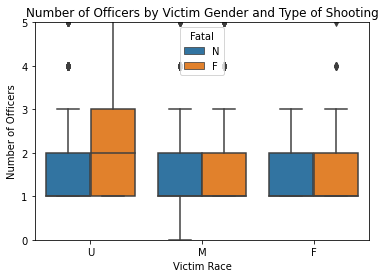

In [613]:
# Side-by-Side Boxplot of Number Of Officers by Victim Gender and Type of Shooting

b6 = sns.boxplot(data = data2,
                 hue = 'Fatal',
                 x = 'SubjectGender',
                 y = 'NumberOfOfficers')

b6.set_ylim([0, 5])

plt.title('Number of Officers by Victim Gender and Type of Shooting')
plt.ylabel('Number of Officers')
plt.xlabel('Victim Race')

plt.show()

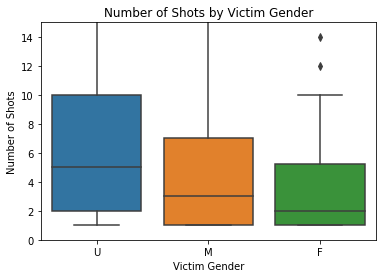

In [1033]:
# Side-by-Side Boxplot of Number of Shots by Victim Gender

b7 = sns.boxplot(data = data_shots1,
                 x = 'SubjectGender',
                 y = 'NumberOfShots')


plt.title('Number of Shots by Victim Gender')
plt.ylabel('Number of Shots')
plt.xlabel('Victim Gender')
b7.set_ylim([0, 15])

plt.show()


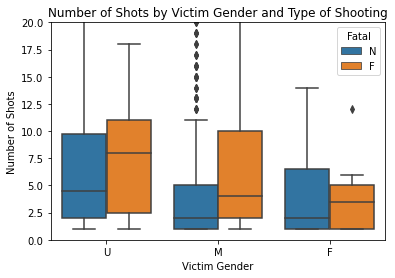

In [1034]:
# Side-by-Side Boxplot of Number of Shots by Victim Gender and Type of Shooting

b8 = sns.boxplot(data = data_shots1,
                 hue = 'Fatal',
                 x = 'SubjectGender',
                 y = 'NumberOfShots')


plt.title('Number of Shots by Victim Gender and Type of Shooting')
plt.ylabel('Number of Shots')
plt.xlabel('Victim Gender')

b8.set_ylim([0, 20])

plt.show()

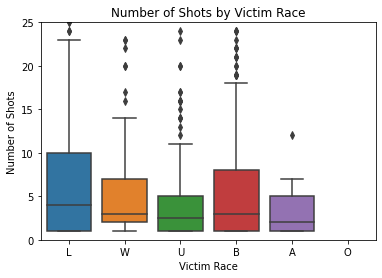

In [1035]:
# Side-by-Side Boxplot of Number of Shots by VictimRace

b9 = sns.boxplot(data = data_shots1,
                 x = 'SubjectRace',
                 y = 'NumberOfShots')

plt.title('Number of Shots by Victim Race')
plt.ylabel('Number of Shots')
plt.xlabel('Victim Race')
b9.set_ylim([0, 25])

plt.show()

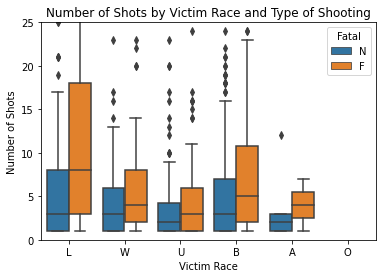

In [1036]:
# Side-by-Side Boxplot of Number of Shots by VictimRace and Type of Shooting

b10 = sns.boxplot(data = data_shots1,
                 hue = 'Fatal',
                 x = 'SubjectRace',
                 y = 'NumberOfShots')

plt.title('Number of Shots by Victim Race and Type of Shooting')
plt.ylabel('Number of Shots')
plt.xlabel('Victim Race')
b10.set_ylim([0, 25])

plt.show()

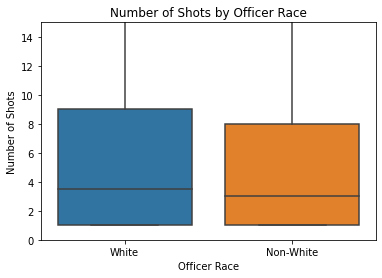

In [1037]:
# Side-by-Side Boxplot of Number of Shots by Officer Race 

b11 = sns.boxplot(data = data_shots1,
                 x = 'OfficerRace2',
                 y = 'NumberOfShots')

plt.title('Number of Shots by Officer Race')
plt.ylabel('Number of Shots')
plt.xlabel('Officer Race')

b11.set_ylim([0, 15])

plt.show()

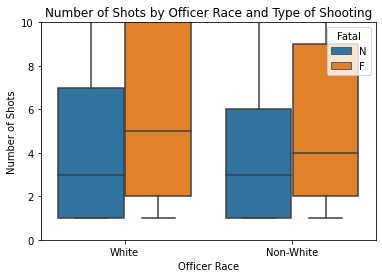

In [1038]:
# Side-by-Side Boxplot of Number of Shots by Officer Race and Type of Shooting

b12 = sns.boxplot(data = data_shots1,
                 hue = 'Fatal',
                 x = 'OfficerRace2',
                 y = 'NumberOfShots')

plt.title('Number of Shots by Officer Race and Type of Shooting')
plt.ylabel('Number of Shots')
plt.xlabel('Officer Race')
b12.set_ylim([0, 10])

plt.show()

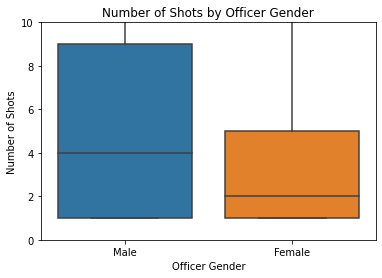

In [1039]:
# Side-by-Side Boxplot of Number of Shots by Officer Gender

b13 = sns.boxplot(data = data_shots1,
                 x = 'OfficerGender2',
                 y = 'NumberOfShots')

plt.title('Number of Shots by Officer Gender')
plt.ylabel('Number of Shots')
plt.xlabel('Officer Gender')
b13.set_ylim([0, 10])

plt.show()

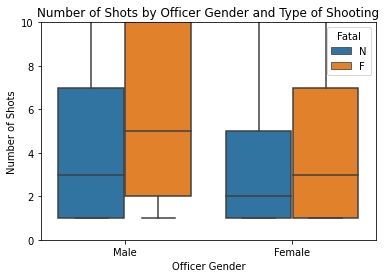

In [1040]:
# Side-by-Side Boxplot of Number of Shots by Officer Gender and Type of Shooting

b14 = sns.boxplot(data = data_shots1,
                 hue = 'Fatal',
                 x = 'OfficerGender2',
                 y = 'NumberOfShots')

plt.title('Number of Shots by Officer Gender and Type of Shooting')
plt.ylabel('Number of Shots')
plt.xlabel('Officer Gender')
b14.set_ylim([0, 10])

plt.show()

In [1041]:
data_shots1.SubjectGender.value_counts()

M    2730
U    1161
F      89
Name: SubjectGender, dtype: int64

In [1042]:
data_shots1.OfficerGender2.value_counts()

Male      2545
Female    1437
Name: OfficerGender2, dtype: int64

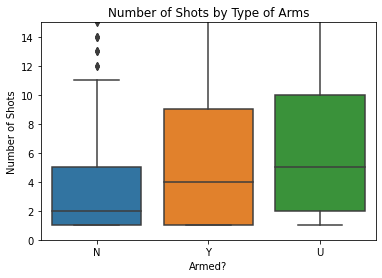

In [1043]:
# Boxplot of Number of Shots by Type of Arms
b15 = sns.boxplot(data = data_shots1,
                 x = 'SubjectArmed',
                 y = 'NumberOfShots')

plt.title('Number of Shots by Type of Arms')
plt.ylabel('Number of Shots')
plt.xlabel('Armed?')
b15.set_ylim([0, 15])

plt.show()

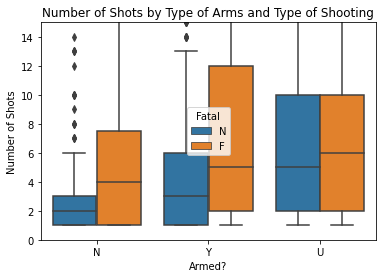

In [1060]:
# Boxplot of Number of Shots by Type of Arms and Type of Shooting
b16 = sns.boxplot(data = data_shots1,
                 hue = 'Fatal',
                 x = 'SubjectArmed',
                 y = 'NumberOfShots')

plt.title('Number of Shots by Type of Arms and Type of Shooting')
plt.ylabel('Number of Shots')
plt.xlabel('Armed?')
b16.set_ylim([0, 15])

plt.show()

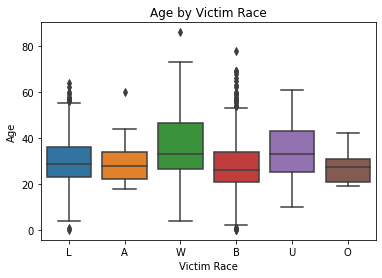

In [1045]:
# Side-by-Side Boxplot of Age by Victim Race

b17 = sns.boxplot(data = data_age,
                 x = 'SubjectRace',
                 y = 'SubjectAge')


plt.title('Age by Victim Race')
plt.ylabel('Age')
plt.xlabel('Victim Race')

plt.show()

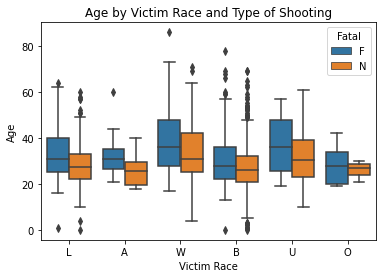

In [1046]:
# Side-by-Side Boxplot of Age by Victim Race

b18 = sns.boxplot(data = data_age,
                 hue = 'Fatal',
                 x = 'SubjectRace',
                 y = 'SubjectAge')


plt.title('Age by Victim Race and Type of Shooting')
plt.ylabel('Age')
plt.xlabel('Victim Race')

plt.show()

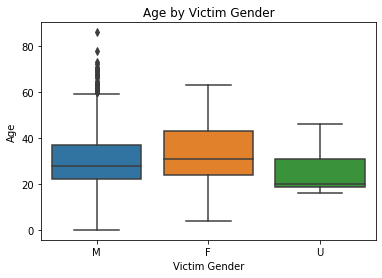

In [1047]:
# Side-by-Side Boxplot of Age by Victim Gender

b19 = sns.boxplot(data = data_age,
                 x = 'SubjectGender',
                 y = 'SubjectAge')


plt.title('Age by Victim Gender')
plt.ylabel('Age')
plt.xlabel('Victim Gender')

plt.show()

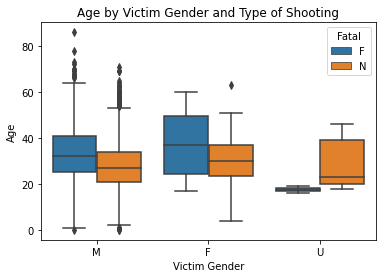

In [1048]:
# Side-by-Side Boxplot of Age by Victim Gender and Type of Shooting

b20 = sns.boxplot(data = data_age,
                 hue = 'Fatal',
                 x = 'SubjectGender',
                 y = 'SubjectAge')


plt.title('Age by Victim Gender and Type of Shooting')
plt.ylabel('Age')
plt.xlabel('Victim Gender')

plt.show()

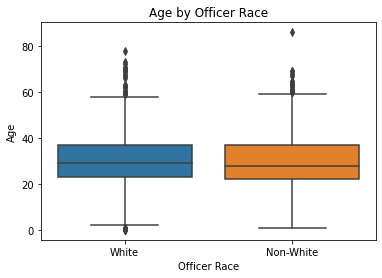

In [1049]:
# Side-by-Side Boxplot of Age by Officer Race

b22 = sns.boxplot(data = data_age,
                 x = 'OfficerRace2',
                 y = 'SubjectAge')


plt.title('Age by Officer Race')
plt.ylabel('Age')
plt.xlabel('Officer Race')

plt.show()

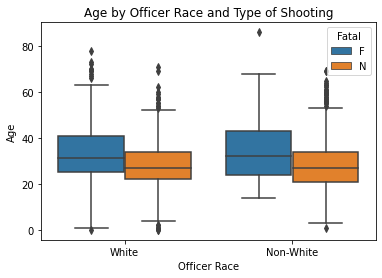

In [1050]:
# Side-by-Side Boxplot of Age by Officer Race and Type of Shooting

b23 = sns.boxplot(data = data_age,
                 hue = 'Fatal',
                 x = 'OfficerRace2',
                 y = 'SubjectAge')


plt.title('Age by Officer Race and Type of Shooting')
plt.ylabel('Age')
plt.xlabel('Officer Race')

plt.show()

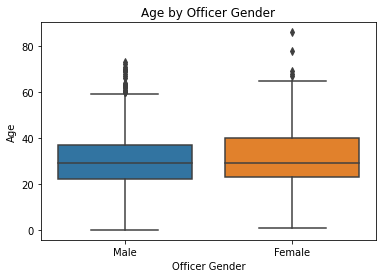

In [1051]:
# Side-by-Side Boxplot of Age by Officer Gender

b24 = sns.boxplot(data = data_age,
                 x = 'OfficerGender2',
                 y = 'SubjectAge')


plt.title('Age by Officer Gender')
plt.ylabel('Age')
plt.xlabel('Officer Gender')

plt.show()

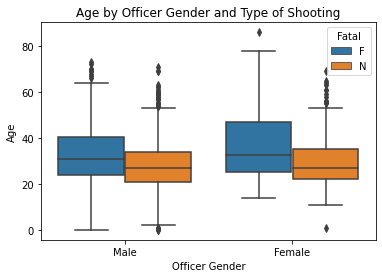

In [1052]:
# Side-by-Side Boxplot of Age by Officer Race and Type of Shooting

b25 = sns.boxplot(data = data_age,
                 hue = 'Fatal',
                 x = 'OfficerGender2',
                 y = 'SubjectAge')


plt.title('Age by Officer Gender and Type of Shooting')
plt.ylabel('Age')
plt.xlabel('Officer Gender')

plt.show()

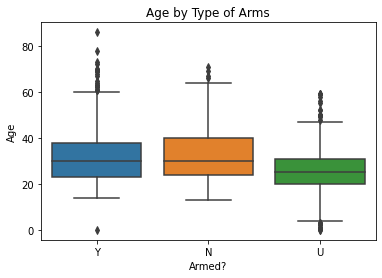

In [1053]:
# Side-by-Side Boxplot of Age by Type of Arms

b26 = sns.boxplot(data = data_age,
                 x = 'SubjectArmed',
                 y = 'SubjectAge')


plt.title('Age by Type of Arms')
plt.ylabel('Age')
plt.xlabel('Armed?')

plt.show()

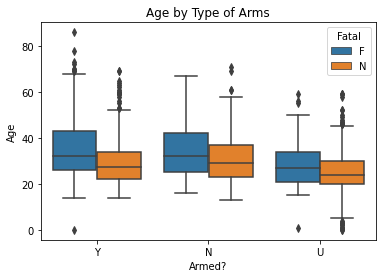

In [1054]:
# Side-by-Side Boxplot of Age by Type of Arms and Type of Shooting

b27 = sns.boxplot(data = data_age,
                 hue = 'Fatal',
                 x = 'SubjectArmed',
                 y = 'SubjectAge')


plt.title('Age by Type of Arms')
plt.ylabel('Age')
plt.xlabel('Armed?')

plt.show()

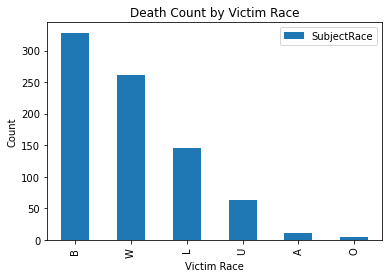

In [1055]:
# Count and Histogram of Deaths by Victim Race
died1 = died.groupby('SubjectRace')

death_by_race = died["SubjectRace"].value_counts()
death_by_race = pd.DataFrame(death_by_race)

death_by_race.plot(kind = 'bar', title = 'Death Count by Victim Race')
plt.xlabel('Victim Race')
plt.ylabel('Count')
plt.show()

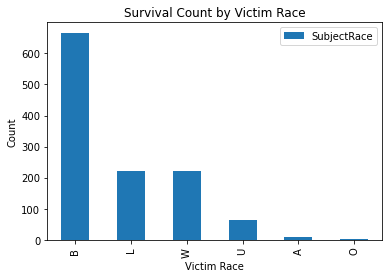

In [1056]:
# Count and Histogram of Deaths by Victim Race
survived1 = survived.groupby('SubjectRace')

survival_by_race = survived["SubjectRace"].value_counts()
survival_by_race = pd.DataFrame(survival_by_race)

survival_by_race.plot(kind = 'bar', title = 'Survival Count by Victim Race')
plt.xlabel('Victim Race')
plt.ylabel('Count')
plt.show()

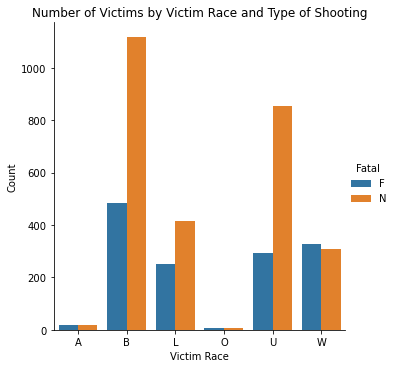

In [1057]:
# Barchart Showing the Count of Fatalaties and Non-Fatalities by Victim Race

victims = data2.groupby(['SubjectRace','Fatal']).size().reset_index(name = 'Count')
victims = pd.DataFrame(victims)
victims

sns.catplot(x = 'SubjectRace', y='Count', 
            hue = 'Fatal',data=victims, 
            kind='bar')

plt.title('Number of Victims by Victim Race and Type of Shooting')
plt.ylabel('Count')
plt.xlabel('Victim Race')

plt.show()

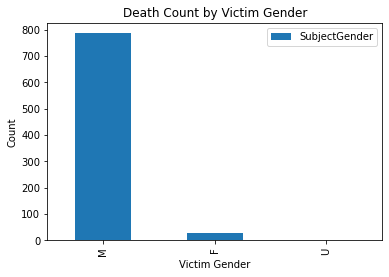

In [1070]:
# Count and Histogram of Deaths by Victim Gender

death_by_gen = died["SubjectGender"].value_counts()
death_by_gen = pd.DataFrame(death_by_gen)

death_by_gen.plot(kind = 'bar', title = 'Death Count by Victim Gender')
plt.xlabel('Victim Gender')
plt.ylabel('Count')
plt.show()

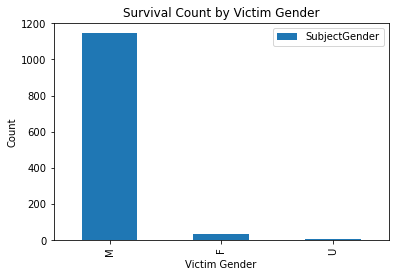

In [1071]:
# Count and Histogram of Survivals by Victim Gender

survival_by_gen = survived["SubjectGender"].value_counts()
survival_by_gen = pd.DataFrame(survival_by_gen)

survival_by_gen.plot(kind = 'bar', title = 'Survival Count by Victim Gender')
plt.xlabel('Victim Gender')
plt.ylabel('Count')
plt.show()

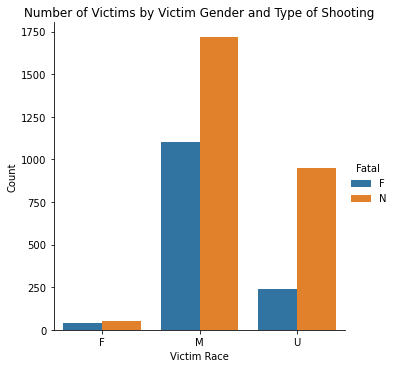

In [1072]:
# Barchart Showing the Count of Fatalaties and Non-Fatalities by Victim Gender

victims2 = data2.groupby(['SubjectGender','Fatal']).size().reset_index(name = 'Count')
victims2 = pd.DataFrame(victims2)
victims2

sns.catplot(x = 'SubjectGender', y='Count', 
            hue = 'Fatal',data=victims2, 
            kind='bar')

plt.title('Number of Victims by Victim Gender and Type of Shooting')
plt.ylabel('Count')
plt.xlabel('Victim Race')

plt.show()

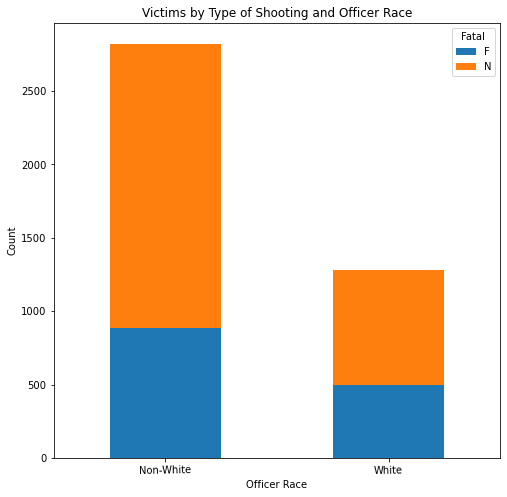

In [1058]:
# Stacked Bar Chart of Victims by Officer Race and Type of Shooting

victims_off1 = data2.groupby(['OfficerRace2','Fatal'])['Fatal'].count()
victims_off1

victims_off1.unstack().plot(kind='bar',stacked=True,rot=1,figsize=(8,8),title="Victims by Type of Shooting and Officer Race")
plt.xlabel('Officer Race')
plt.ylabel('Count')
plt.show()


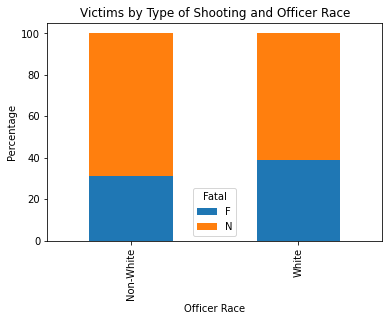

In [1059]:
# Stacked Bar Chart of Victims by Officer Race and Type of Shooting By Proportion
victims_off2 = victims_off1.unstack()
victims_off2.index = ['Non-White','White']

victims_off2
                
stacked_data = victims_off2.apply(lambda x: x*100/sum(x), axis=1)
stacked_data.plot(kind="bar", stacked=True, title="Victims by Type of Shooting and Officer Race")
plt.xlabel('Officer Race')
plt.ylabel('Percentage')
plt.show()

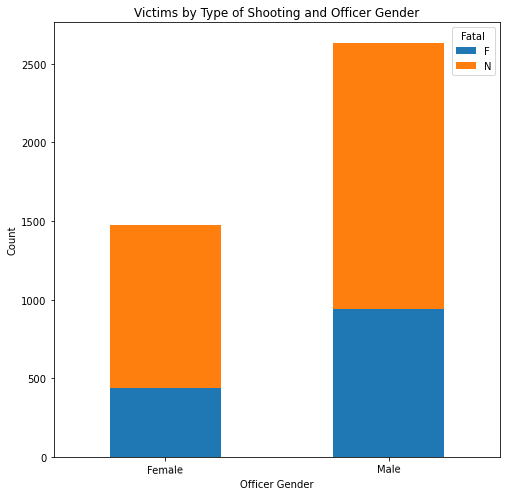

In [1061]:
# Stacked Bar Chart of Victims by Officer Race and Type of Shooting

victims_off_gen = data2.groupby(['OfficerGender2','Fatal'])['Fatal'].count()
victims_off_gen

victims_off_gen.unstack().plot(kind='bar',stacked=True,rot=1,figsize=(8,8),title="Victims by Type of Shooting and Officer Gender")
plt.xlabel('Officer Gender')
plt.ylabel('Count')
plt.show()

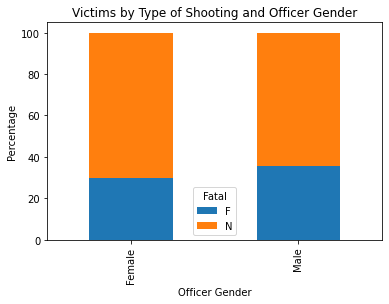

In [1069]:
# Stacked Bar Chart of Victims by Officer Race and Type of Shooting By Proportion
victims_off_gen2 = victims_off_gen.unstack()

stacked_data1 = victims_off_gen2.apply(lambda x: x*100/sum(x), axis=1)
stacked_data1.plot(kind="bar", stacked=True, title="Victims by Type of Shooting and Officer Gender")
plt.xlabel('Officer Gender')
plt.ylabel('Percentage')
plt.show()

                


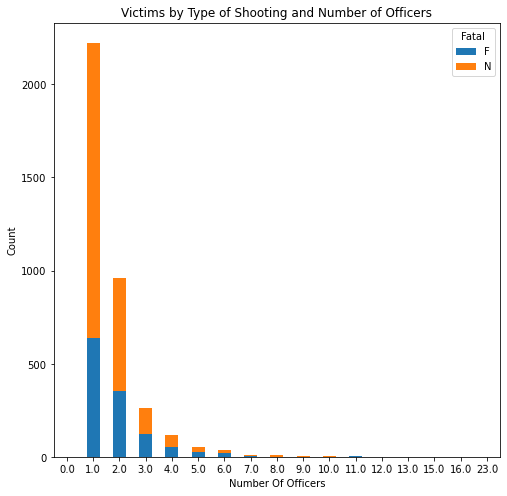

In [1354]:
# Bar Chart of Victims by Number Of Officers

num_off = data2.groupby(['NumberOfOfficers','Fatal'])['Fatal'].count()
num_off

num_off.unstack().plot(kind='bar',stacked=True,rot=1,figsize=(8,8),title="Victims by Type of Shooting and Number of Officers")
plt.xlabel('Number Of Officers')
plt.ylabel('Count')
plt.show()

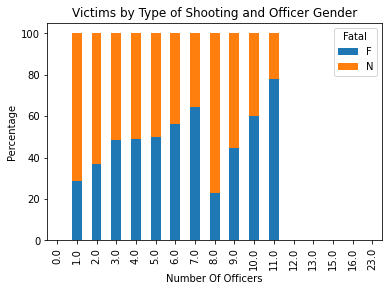

In [1355]:
num_off2 = num_off.unstack()

stacked_data2 = num_off2.apply(lambda x: x*100/sum(x), axis=1)
stacked_data2.plot(kind="bar", stacked=True, title="Victims by Type of Shooting and Officer Gender")
plt.xlabel('Number Of Officers')
plt.ylabel('Percentage')
plt.show()

In [501]:
# Examine count, mean, median, quantiles, and standard deviation of age of fatally shot victims
died_age = died[["SubjectAge"]]
print(died1.describe());print("\n")

# Examine count, mean, median, quantiles, and standard deviation of age of non-fatally shot victims
survived_age = survived[['SubjectAge']]
print(survived1.describe())


            NumberOfSubjects                                    SubjectAge  \
                       count mean  std  min  25%  50%  75%  max      count   
SubjectRace                                                                  
A                       11.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0       11.0   
B                      328.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0      328.0   
L                      146.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0      146.0   
O                        5.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0        5.0   
U                       63.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0       63.0   
W                      261.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0      261.0   

                        ...             NumberOfOfficers                      \
                  mean  ...   75%   max            count      mean       std   
SubjectRace             ...                                                    
A            33.000000  ...  35.0  60.0             11.0 

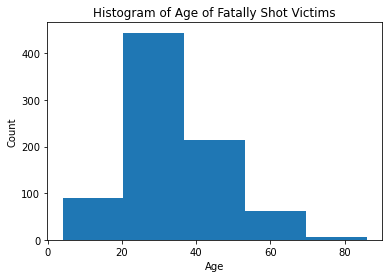

In [502]:
# Histogram of age of fatally shot victims
died_age2 = died_age.SubjectAge
plt.hist(died_age2,bins = 5)

plt.title('Histogram of Age of Fatally Shot Victims')
plt.ylabel('Count')
plt.xlabel('Age')

plt.show()

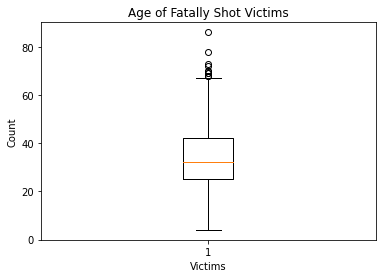

In [503]:
# Boxplot of age of fatally shot victims
plt.boxplot(died_age2)

plt.title('Age of Fatally Shot Victims')
plt.ylabel('Count')
plt.xlabel('Victims')

plt.show()

/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning:

invalid value encountered in greater_equal

/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning:

invalid value encountered in less_equal



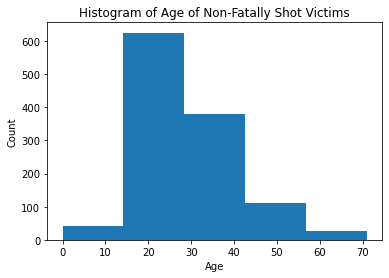

In [504]:
# Histogram of age of non-fatally shot victims
survived_age2 = survived_age.SubjectAge
plt.hist(survived_age2, bins = 5)

plt.title('Histogram of Age of Non-Fatally Shot Victims')
plt.ylabel('Count')
plt.xlabel('Age')

plt.show()


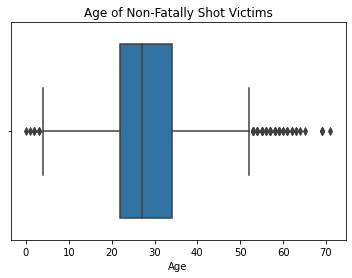

In [505]:
sns.boxplot(survived_age2)

plt.title('Age of Non-Fatally Shot Victims')
plt.xlabel('Age')

plt.show()

(array([232.,  30.,   6.,   3.,   4.]),
 array([ 1. , 15.8, 30.6, 45.4, 60.2, 75. ]),
 <a list of 5 Patch objects>)

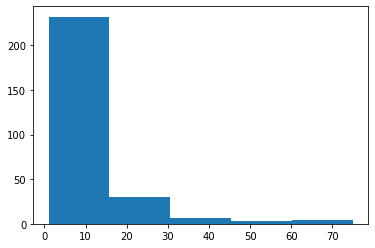

In [957]:
died_shots1 = died_shots[['NumberOfShots']]
died_shots2 = died_shots1.NumberOfShots

plt.hist(died_shots2,bins = 5)



(array([297.,  18.,   1.,   1.,   7.]),
 array([ 1. , 15.8, 30.6, 45.4, 60.2, 75. ]),
 <a list of 5 Patch objects>)

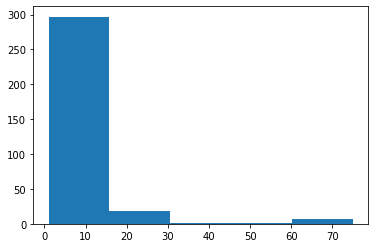

In [958]:
survived_shots1 = survived_shots[['NumberOfShots']]
survived_shots2 = survived_shots1.NumberOfShots

plt.hist(survived_shots2,bins = 5)

# **Summary of EDA**

From the exploratory data analysis, a few things were particularly noticeable. 

Firstly, the number of officers was basically identical across victim race, victim gender, officer race, officer gender, and the type of shooting. That is, even when accounting for the type of shooting, the number of officers did not vary for either victim gender/race or officer gender/race, which I found to be surprising. 

Secondly, the number of shots, in opposition to the number of officers, vary widely by race and gender for both victims and officers. The number of shots by victim gender boxplot showed that the median number of shots at women was 2 while the median number of shots at men was 3. The distribution of shots at men was shifted further vertically compared to that of women, which could be inferred by the higher whiskers and the higher 75th percentile mark. When the data was further segregated by type of shooting, it showed that the median number of shots at women was higher when the shooting was fatal but the distributions themselves were not significantly different, whereas for men the median number of shots when the shooting was fatal was nearly 5 compared to a median of 2.5 when the shooting was not fatal and the distributions of the number of shots in fatal shootings was shifted higher vertically. The difference was even more pronounced when comparing male and female officers. The median number of shots by female officers was 2 whereas that of male officers was 4 and the 75th percentile of the number of shots by female officers was 4 compared to 8 by male officers. And when the type of shooting was included, the median for fatalities for higher for both male and female officers, but the difference between the distributions of the number of shots by male and female officers became even more stark. The median number of shots by male officers in non-fatal shootings was 3 compared to a median of 5 in fatal shootings while the the median number of shots by female officers in non-fatal shootings was 2 and in fatal shootings was 3. In fact, the distribution of the number of shots by female officers in fatal shooting mirrored that of male officers in non-fatal shootings. 

While not surprising, it is nonethless notable that the number of shots varied more by whether a victim was armed or not. The median number of shots when a victim was bearing a weapon of some kind was 4 as opposed to 2 when a victim was not bearing a weapon. The median number of shots in fatal shootings when a victim bore arms was 5 while the median number of shots in non-fatal shootings when a victim bore arms was 3. 

The distribution of the number of shots by victim race was similar across all races although the 75th perentile, IQR, and upper whisker was far higher for latino people and black people than it was for white people. Latino's also had a slightly higher median. And when the boxplots were further subdivided by type of shooting, the median number of shots was higher for every race when the shooting was fatal. That is, while the number of shots by race alone conveyed that no race was shot at significantly more than any other, when the type of shooting was introduced, it showed that the for every race, the median number of shots was higher in cases of fatal police shootings. Additionally, while the two distributions for white people shot fatally and non-fatally were fairly similar, those for latinos and black people were vastly shifted. The median for latinos shot fatally was 8 and the median for latinos shot non-fatally was about 2.5 and median for blacks shot fatally was 5 and the median for blacks shot non-fatally was about 2.5. As for officer race, the median number of shots by officer race was the same regardless of officer race, and the distribution of the number of shots by white officers was nearly identical to that of non-white officers. When segmented by the type of shooting, as with the previous two variables, the median number of shots in fatal shootings was much higher than that of non-fatal shootings, but the median number of shots in fatal shootings by white officers was higher than that of fatal shootings by non-white officers. 


Thirdly, the age tended to vary by race and gender as well but not to the same extent as the number of shots. The boxplot on the age of victims by race show that the median age was similar across all races except for white people who had a slightly higher median age. When partitioned by type of shooting, the median age was slightly lower for all races of victims that were shot and survived compared to victims that were shot and killed, which was interesting because it was so unexpected. The median age did differ across victim gender, but not by too much, with the median age of men shot by police being slightly lower than that of women, which was unexepcted. The distribution of the age of women shot was actually shifted upward compared to that of men, as the lower whisker was higher, though men had more outliers.  This characteristic remains unchanged when looking at the distributions when categorized by type of shooting as well, except for the fact that the distribution of age was higher for fatal shootings of both male and female victims. Similarly, while age didn't seem to vary with officer race or gender or whether or not a subject was armed, when the type of shooting was taken into account, the distribution tended to shift upwards. That is, the median age increased in cases where shootings were fatal for both genders, both races, and both unarmed and armed victims. 


Fourhthly, the bar plots that show survival count by type of shooting and victim race show that black people were shot more than any other race and that they were killed more than any other race. This comes as a huge surprise because black people make up a minority of the US population at about 13%, but constitute the majority of police shootings across 50 major US cities. However, this is likely a consequence of the fact that the dataset is a biased sample of police shootings, as suggested at the outset. According to a more comprehensive study by the Washington Post on fatal police shootings alone that included rural police departments as well, black people were also killed disproportionately (i.e. accounted for more than 13% of total fatal police shootings) but did not make up the majority of police fatalities. Rather, white people did, which seems more reasonable given that they make up 60% of the US population. Another interesting insight that was gathered from one of the bar chart plots examining the counts of shootings by type of shooting and victim race that showed that, of every race, only white people had been shot fatally more than non-fatally. That is, black people and latino people experienced more non-fatal shootings than fatal-shootings as oppsoed to white people. It was similar when looking at the death and survival count by victim gender. Men died with far more frequency compared to women but it seemed that women died at a higher proportion. This then prompted me to look at the count of the type of shootings by officer race. While there were more total or aggregate victims of non-white officers, the proportion of fatalities for non-white officers was around 35% whereas the proportion of fatalities for white officers was around 40%. I then examined the count of the type of shootings by officer gender. While there were more total or aggregate victims of male officers, the proportion of fatalities by female and male officers seemed to be nearly the same. Surprisingly, the number of officers, which at first seemed negligible, showed the most correlation with type of shooting. That is, as the number of officers increased, the proportion of fatalities increased as a percentage of total victims.


# Modeling 


In [121]:
# Create new variable that codes F as 0 and N as 1
        
for i,rowseries in data_shots_age1.iterrows():
    if data_shots_age1.at[i,'Fatal'] == 'F':
        data_shots_age1.at[i,'Fatal2'] = 0
    elif data_shots_age1.at[i,'Fatal'] == 'N':
        data_shots_age1.at[i,'Fatal2'] = 1
        

for i,rowseries in data_rand.iterrows():
    if data_rand.at[i,'Fatal'] == 'F':
        data_rand.at[i,'Fatal2'] = 0
    elif data_rand.at[i,'Fatal'] == 'N':
        data_rand.at[i,'Fatal2'] = 1
        

data4 = data_shots_age1[['NumberOfShots','SubjectRace','SubjectAge','SubjectGender','OfficerRace2','OfficerGender2','Fatal2','NumberOfOfficers']]
data4 = data4.dropna()

dataR = data_rand[['NumberOfShots','SubjectRace','SubjectAge','SubjectGender','OfficerRace2','OfficerGender2','Fatal2','NumberOfOfficers']]
dataR = dataR.dropna()

In [122]:
print(len(data4))
print(len(dataR))

767
3580


In [123]:
# Change data type of NumberOfShots
print((data4.SubjectAge.dtypes))

data4.NumberOfShots = pd.to_numeric(data4.NumberOfShots)
print((data4.NumberOfShots.dtypes))

float64
int64


In [124]:
# Change data type of variables for random dataset

dataR['OfficerRace2']=dataR['OfficerRace2'].apply(str)
dataR['OfficerGender2']=dataR['OfficerGender2'].apply(str)
dataR['SubjectGender']=dataR['SubjectGender'].apply(str)
dataR['SubjectRace']=dataR['SubjectRace'].apply(str)

dataR.NumberOfShots = pd.to_numeric(dataR.NumberOfShots)

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/genmod/families/family.py:894: RuntimeWarning:

invalid value encountered in true_divide



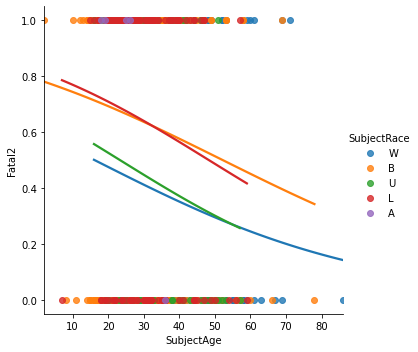

In [1404]:
# Logistic Curve/Plot 1

sns.lmplot(x='SubjectAge', y='Fatal2', hue ='SubjectRace', data = data4, logistic=True, ci = None)

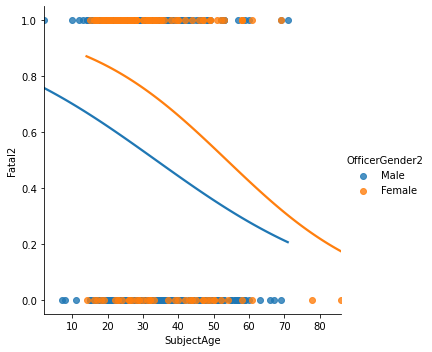

In [1405]:
# Logistic Curve/Plot 2

sns.lmplot(x='SubjectAge', y='Fatal2', hue ='OfficerGender2', data = data4, logistic=True, ci = None)

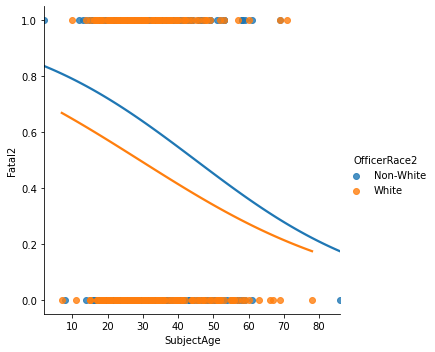

In [1406]:
# Logistic Curve/Plot 3

sns.lmplot(x='SubjectAge', y='Fatal2', hue ='OfficerRace2', data = data4, logistic=True, ci = None)


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/genmod/families/family.py:894: RuntimeWarning:

invalid value encountered in true_divide

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/_tools.py:121: RuntimeWarning:

divide by zero encountered in double_scalars

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/_tools.py:121: RuntimeWarning:

invalid value encountered in double_scalars



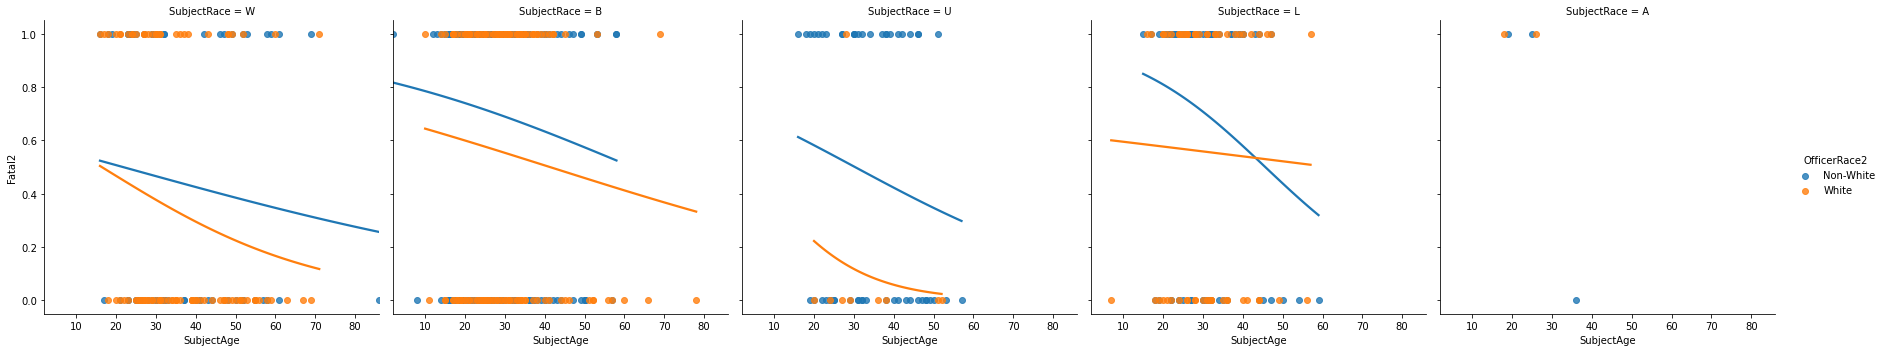

In [1411]:
# Logistic Curve/Plot 4

sns.lmplot(x='SubjectAge', y='Fatal2', hue ='OfficerRace2', col = 'SubjectRace', data = data4, logistic=True, ci = None)


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/_tools.py:121: RuntimeWarning:

divide by zero encountered in double_scalars



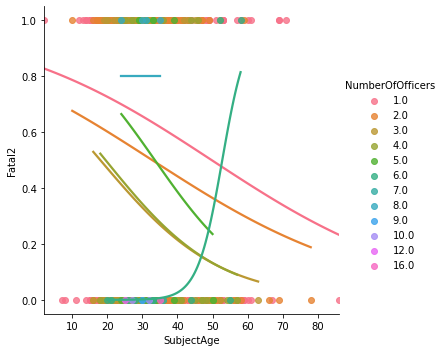

In [1408]:
#Logistic Curve/Plot 5

sns.lmplot(x='SubjectAge', y='Fatal2', hue ='NumberOfOfficers', data = data4, logistic=True, ci = None)


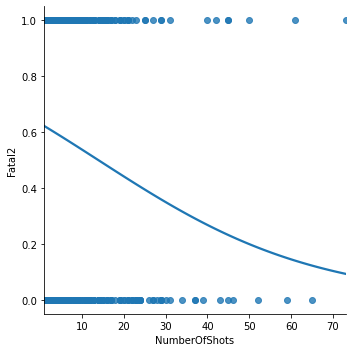

In [1412]:
#Logistic Curve/Plot 6

sns.lmplot(x='NumberOfShots', y='Fatal2', data = data4, logistic=True, ci = None)

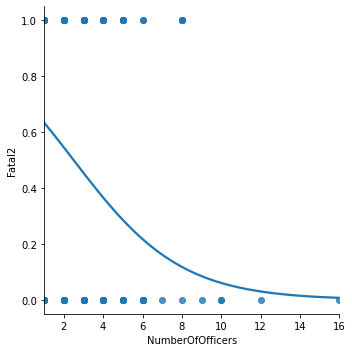

In [1413]:
#Logistic Curve/Plot 7

sns.lmplot(x='NumberOfOfficers', y='Fatal2', data = data4, logistic=True, ci = None)

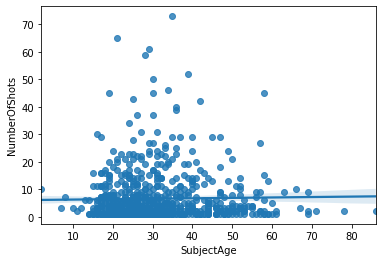

In [1414]:
# Are the number of shots and age correlated?

sns.regplot(x = 'SubjectAge', y = 'NumberOfShots', data = data4)

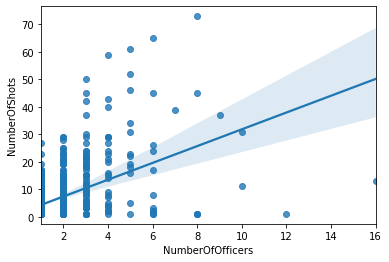

In [1415]:
# Are the number of officers and shots correlated?

sns.regplot(x = 'NumberOfOfficers', y = 'NumberOfShots', data = data4)

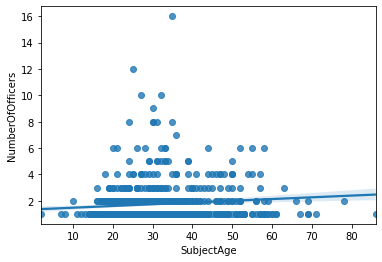

In [1416]:
# Are the number of officers and age correlated?

sns.regplot(x = 'SubjectAge', y = 'NumberOfOfficers', data = data4)

In [146]:
# Creation of Dependent Variable Sets and Independent Variables

X1 = data4[['SubjectAge','NumberOfOfficers','NumberOfShots','SubjectRace','OfficerGender2','OfficerRace2']]
X2 = data4[['SubjectAge','NumberOfOfficers','NumberOfShots','SubjectRace','OfficerGender2','OfficerRace2']]
X3 = dataR[['SubjectAge','NumberOfOfficers','NumberOfShots','SubjectRace','OfficerGender2','OfficerRace2']]

Y1 = data4.Fatal2
Y2 = data4.Fatal2
Y3 = dataR.Fatal2


In [126]:
# Recode Factor/String Variables into Binary Dummy Variables (e.g. Non-White = 0 and White = 1)
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
for column_name in X1.columns:
    if X1[column_name].dtype == object:
        X1[column_name] = le.fit_transform(X1[column_name])
    else:
        pass

<ipython-input-126-72234d190770>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X1[column_name] = le.fit_transform(X1[column_name])


In [127]:
# Check for Class Bias/Imbalanced Classes 

print(data4.groupby('Fatal2').size())

# Correct Imbalance Using Synthetic Minority Oversampling Technique (SMOTE)
from imblearn.over_sampling import SMOTE

# Transform the Dataset
oversample = SMOTE()
X1, Y1 = oversample.fit_resample(X1, Y1)

Fatal2
0.0    329
1.0    438
dtype: int64


In [128]:
# Model 1

# Split X and Y into Training and Testing Sets

from sklearn.model_selection import train_test_split

X1_train,X1_test,Y1_train,Y1_test=train_test_split(X1,Y1,test_size=0.25,random_state=3)

In [129]:
# Import the Logistic Regression Model
from sklearn.linear_model import LogisticRegression

# Create Instance of Model
logreg = LogisticRegression(solver = 'liblinear',random_state = 3)

# Fit the Model with Training Data
logreg.fit(X1_train,Y1_train)

# Create Predictions based on Test Data
Y1_pred=logreg.predict(X1_test)

In [130]:
# Import the Metrics Class and Create Confusion Matrix
from sklearn import metrics

# Create Confusion Matrix to see Accuracy of Model Predictions
cnf_matrix1 = metrics.confusion_matrix(Y1_test, Y1_pred)
cnf_matrix1

array([[71, 42],
       [33, 73]])

Text(0.5, 257.44, 'Predicted label')

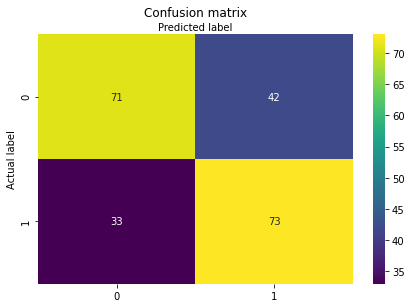

In [131]:
# Plot of Confusion Matrix

%matplotlib inline

class_names1=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks1 = np.arange(len(class_names1))
plt.xticks(tick_marks1, class_names1)
plt.yticks(tick_marks1, class_names1)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix1), annot=True, cmap="viridis" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [132]:
# Accuracy and Precision of Model

print("Accuracy:",metrics.accuracy_score(Y1_test, Y1_pred))
print("Precision:",metrics.precision_score(Y1_test, Y1_pred))
print("Recall:",metrics.recall_score(Y1_test, Y1_pred))

Accuracy: 0.6575342465753424
Precision: 0.6347826086956522
Recall: 0.6886792452830188


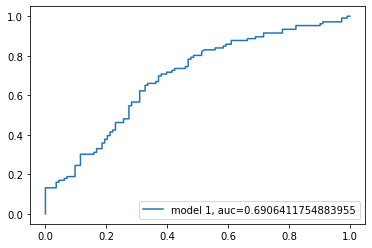

In [133]:
# ROC Curve

Y1_pred_proba = logreg.predict_proba(X1_test)[::,1]
fpr1, tpr1, _ = metrics.roc_curve(Y1_test,  Y1_pred_proba)
auc1 = metrics.roc_auc_score(Y1_test, Y1_pred_proba)
plt.plot(fpr1,tpr1,label="model 1, auc="+str(auc1))
plt.legend(loc=4)
plt.show()

In [134]:
# Model Summary

# Import sm and logit models
import statsmodels.api as sm
from statsmodels.formula.api import logit

train_data1, test_data1 = train_test_split(data4, test_size = 0.20, random_state = 42)

formula1 = ('Fatal2 ~ NumberOfShots + NumberOfOfficers + SubjectAge + SubjectRace + OfficerRace2 + OfficerGender2')
mod1 = logit(formula = formula1, data = train_data1).fit()

mod1.summary()

Optimization terminated successfully.
         Current function value: 0.607991
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Fatal2   No. Observations:                  613
Model:                          Logit   Df Residuals:                      603
Method:                           MLE   Df Model:                            9
Date:                Sat, 05 Dec 2020   Pseudo R-squ.:                  0.1038
Time:                        12:59:46   Log-Likelihood:                -372.70
converged:                       True   LL-Null:                       -415.86
Covariance Type:            nonrobust   LLR p-value:                 8.860e-15
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  3.2442      1.212      2.678      0.007       0.869       5.619
SubjectRace[T.B]          -0.7528      1.171     -0.643      0.520      -3.047       1.542
SubjectRace[T.L]          -0.6441      1.183     -0.544      0.586      -2.963       1.675
SubjectRace[T.U]          -1.2155      1.208     -1.006      0.314      -3.583       1.152
SubjectRace[T.W]          -1.4465      1.182     -1.224      0.221      -3.762       0.869
OfficerRace2[T.White]     -0.3583      0.193     -1.858      0.063      -0.736       0.020
OfficerGender2[T.Male]    -0.5985      0.252     -2.375      0.018      -1.092      -0.105
NumberOfShots             -0.0237      0.013     -1.867      0.062      -0.049       0.001
NumberOfOfficers          -0.2671      0.085     -3.126      0.002      -0.435      -0.100
SubjectAge                -0.0240      0.008     -2.902      0.004      -0.040      -0.008
==========================================================================================
"""

In [135]:
print(np.exp(mod1.params))

Intercept                 25.640115
SubjectRace[T.B]           0.471023
SubjectRace[T.L]           0.525144
SubjectRace[T.U]           0.296560
SubjectRace[T.W]           0.235393
OfficerRace2[T.White]      0.698836
OfficerGender2[T.Male]     0.549660
NumberOfShots              0.976582
NumberOfOfficers           0.765601
SubjectAge                 0.976242
dtype: float64


In [147]:
# Recode Factor/String Variables into Binary Dummy Variables (e.g. Non-White = 0 and White = 1)

for column_name in X2.columns:
    if X2[column_name].dtype == object:
        X2[column_name] = le.fit_transform(X2[column_name])
    else:
        pass

<ipython-input-147-7128ef54baab>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X2[column_name] = le.fit_transform(X2[column_name])


In [148]:
# Check for Class Bias/Imbalanced Classes 

print(data4.groupby('Fatal2').size())

# Do NOT Correct Imbalance Using Synthetic Minority Oversampling Technique (SMOTE)

Fatal2
0.0    329
1.0    438
dtype: int64


In [149]:
# Model 2

# Split X and Y into Training and Testing Sets

X2_train,X2_test,Y2_train,Y2_test=train_test_split(X2,Y2,test_size=0.25,random_state=3)

In [150]:
# Create Instance of Model
logreg2 = LogisticRegression(solver = 'liblinear',random_state = 3)

# Fit the Model with Training Data
logreg2.fit(X2_train,Y2_train)

# Create Predictions based on Test Data
Y2_pred=logreg2.predict(X2_test)

In [151]:
# Create Confusion Matrix to see Accuracy of Model Predictions
cnf_matrix2 = metrics.confusion_matrix(Y2_test, Y2_pred)
cnf_matrix2

array([[41, 43],
       [22, 86]])

Text(0.5, 257.44, 'Predicted label')

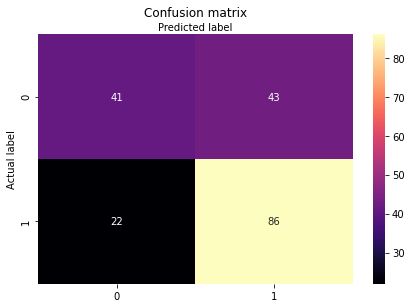

In [152]:
# Plot of Confusion Matrix

%matplotlib inline

class_names2=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks2 = np.arange(len(class_names2))
plt.xticks(tick_marks2, class_names2)
plt.yticks(tick_marks2, class_names2)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix2), annot=True, cmap="magma" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [153]:
# Accuracy and Precision of Model

print("Accuracy:",metrics.accuracy_score(Y2_test, Y2_pred))
print("Precision:",metrics.precision_score(Y2_test, Y2_pred))
print("Recall:",metrics.recall_score(Y2_test, Y2_pred))

Accuracy: 0.6614583333333334
Precision: 0.6666666666666666
Recall: 0.7962962962962963


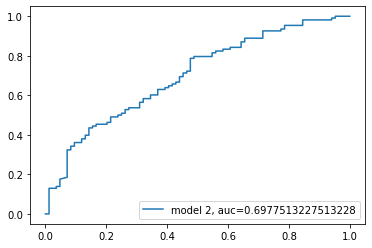

In [154]:
# ROC Curve

Y2_pred_proba = logreg2.predict_proba(X2_test)[::,1]
fpr2, tpr2, _ = metrics.roc_curve(Y2_test,  Y2_pred_proba)
auc2 = metrics.roc_auc_score(Y2_test, Y2_pred_proba)
plt.plot(fpr2,tpr2,label="model 2, auc="+str(auc2))
plt.legend(loc=4)
plt.show()

In [144]:
train_data2, test_data2 = train_test_split(dataR, test_size = 0.20, random_state = 42)

formula2 = ('Fatal2 ~ NumberOfShots + NumberOfOfficers + SubjectAge + SubjectRace + OfficerRace2 + OfficerGender2')
mod2 = logit(formula = formula2, data = train_data2).fit()

mod2.summary()

Optimization terminated successfully.
         Current function value: 0.613992
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Fatal2   No. Observations:                 2864
Model:                          Logit   Df Residuals:                     2854
Method:                           MLE   Df Model:                            9
Date:                Sat, 05 Dec 2020   Pseudo R-squ.:                 0.03732
Time:                        13:00:11   Log-Likelihood:                -1758.5
converged:                       True   LL-Null:                       -1826.7
Covariance Type:            nonrobust   LLR p-value:                 5.824e-25
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  1.6152      0.211      7.670      0.000       1.202       2.028
SubjectRace[T.B]          -0.0255      0.177     -0.144      0.885      -0.372       0.321
SubjectRace[T.L]          -0.1447      0.185     -0.781      0.435      -0.508       0.219
SubjectRace[T.O]          -0.6882      0.591     -1.164      0.244      -1.846       0.470
SubjectRace[T.W]          -0.6641      0.185     -3.588      0.000      -1.027      -0.301
OfficerRace2[T.White]     -0.3131      0.090     -3.472      0.001      -0.490      -0.136
OfficerGender2[T.Male]    -0.1763      0.095     -1.854      0.064      -0.363       0.010
NumberOfShots              0.0059      0.004      1.421      0.155      -0.002       0.014
NumberOfOfficers          -0.2238      0.031     -7.163      0.000      -0.285      -0.163
SubjectAge                -0.0050      0.003     -1.875      0.061      -0.010       0.000
==========================================================================================
"""

In [66]:
print(np.exp(mod2.params))

Intercept                 5.555752
SubjectRace[T.B]          0.960103
SubjectRace[T.L]          0.861704
SubjectRace[T.O]          0.528358
SubjectRace[T.W]          0.530920
OfficerRace2[T.White]     0.735702
OfficerGender2[T.Male]    0.835090
NumberOfShots             0.997700
NumberOfOfficers          0.804405
SubjectAge                0.994838
dtype: float64


In [ ]:
# Check for Class Bias/Imbalanced Classes 

print(dataR.groupby('Fatal2').size())

# Correct Imbalance Using Synthetic Minority Oversampling Technique (SMOTE)

oversample = SMOTE()
X3, Y3 = oversample.fit_resample(X3, Y3)

In [ ]:
# Model 3

# Split X and Y into Training and Testing Sets

X3_train,X3_test,Y3_train,Y3_test=train_test_split(X3,Y3,test_size=0.25,random_state=3)

In [ ]:
# Create Instance of Model
logreg3 = LogisticRegression(solver = 'liblinear',random_state = 3)

# Fit the Model with Training Data
logreg3.fit(X3_train,Y3_train)

# Create Predictions based on Test Data
Y3_pred=logreg3.predict(X3_test)

In [ ]:
# Create Confusion Matrix to see Accuracy of Model Predictions
cnf_matrix3 = metrics.confusion_matrix(Y3_test, Y3_pred)
cnf_matrix3

In [ ]:
# Plot of Confusion Matrix

%matplotlib inline

class_names3=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks3 = np.arange(len(class_names3))
plt.xticks(tick_marks3, class_names3)
plt.yticks(tick_marks3, class_names3)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix3), annot=True, cmap="inferno" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
# Accuracy and Precision of Model

print("Accuracy:",metrics.accuracy_score(Y3_test, Y3_pred))
print("Precision:",metrics.precision_score(Y3_test, Y3_pred))
print("Recall:",metrics.recall_score(Y3_test, Y3_pred))

In [ ]:
# ROC Curve

Y3_pred_proba = logreg3.predict_proba(X3_test)[::,1]
fpr3, tpr3, _ = metrics.roc_curve(Y3_test,  Y3_pred_proba)
auc3 = metrics.roc_auc_score(Y3_test, Y3_pred_proba)
plt.plot(fpr3,tpr3,label="model 3, auc="+str(auc3))
plt.legend(loc=4)
plt.show()

# Modeling Summary

In general, a few patterns from the EDA stage stood out to me. Firstly, there seemed to be a pattern of the number of shots and the age being higher for fatal shootings compared to non-fatal shootings. Secondly, as the number of officers increased, the proportion of fatalities as a share of types of shootings increased. Thirdly, black and latino people were shot at more, but died less in comparison to white people and asian people. Fourthly, females were shot at less than males on average, but appeared to die more often and female officers appeared to shoot less frequently than male officers and kill a lower proportion of people. And, lastly, white officers appeared to kill a higher proportion of people than non-whtie officers These findings prompted me to generate the following questions:

1. Are white people are more likely to die from police shootings than non-white people?

2. Does the type of officer (male or female | white or non-white) determine the likelihood of dying? 

3. Does an increase in the number of officers increase the likelihood of dying?

4. Does an increase in the number of shots increase the likelihood of dying?

5. Does an increase in age increase the likelihood of dying?

To answer these questions, I created a series of logistic regession plots. The first five plots show fatalities as a logistic function of age and an additional variable. Each of these plots showed that your odds of dying increase as your age increases so the answer to question 5 was a resounding yes. The plot of fatalities as a logistic function of victim race and age, moreover, corroborated the bar chart findings from the EDA that the only races for which non-fatalaties exceeded fatalities were latino and black people since, as can be seen in the plot of the logistic model, black people and latino people are far more likely than any other race to survive a police shooting. The finding therefore illustrates that the odds of dying are higher if you are white than if you are latino or black. The second logistic plot of survival as a function of officer gender shows that your odds of dying are higher when you are shot by a male officer compared to a female officers. This was not reflected in the bar charts from the EDA process but it was reflected in the boxplots, which showed that distribution of the number of shots both in general and in view of the type of shooting differed for male and female officers. The logistic plot of survival as a function of officer race (and victim race) is highly interesting as well as it corroborated the literature that, indeed, black and latino people are no more likely to be shot by white police officers than white people are, however, it also highlighted something I had not seen in the literature I came across: regardless of race, victims of police shootings have a greater probability of dying when shot by white police officers compared to non-white police officers. Lastly, the fourth plot corroborated the EDA finding that the proportion of fatalities increases as the number of officers increases as it showed that, except when the number of officers is 5 (it's hard to tell due to the color scale), an increase in the number of officers corresponds to an increase in the probability of dying. The second to last plot shows that as the number of shots increases, the probability of dying increases as well, which could be seen throughout the EDA process in the different boxplots examining the the number of shots by fatality. And the last plot shows that as the number of officers increases, the probability of dying increases as well, which could be seen in the bar chart showing the variation of the proportion of fatalities by the number of officers.

Based on the EDA and preliminary modeling, I decided to use the number of shots, victim age, the number of officers, victim race, officer race, and officer gender my indpendent variables. Thus, my hypothesis was as follows:

Hypothesis: The greater the number of white, male officers, the number of shots, and the age of the victim, the greater the probability of dying from a fatal police shooting.

Before doing any further modeling, I decided to check whether the number of officers variable, number of shots variable, and age variable were correlated to make sure that my hypothesis was valid. I did so by producing three scatterplots of each relationship and found that they were not correlated. I then proceeded to test the hypothesis above using a multiple logistic regression model. In order to use a logistic regression model, the binary independent variable must be balanced. This is so the model doesn't underpredict the probability of one possibile outcome or the other. For example, if there were 900 1's and 100 0's, the model would be biased toward predicting a 1, so by balancing the class, this bias is eliminated. There are a number of methods that can be used to correct class imbalance/bias, but I opted to use the synthetic minority oversampling technique (SMOTE), which is a fancy way of saying I increased the number of 0's by randomly sampling from the existing set of 0's such that the number of 0's and 1's was made equal. Although there was only very modest class bias in this case, I decided to go ahead and apply SMOTE. However, beause there was such slight class bias to begin with, non of my models were significantly improved by doing so, but it is nonetheless a good practice.

The hypothesis was answered using a multivariate logistic regression model in which the type of shooting (fatal or non-fatal) was modeled as a function of the number of shots, the race of the victim, the race of the officer, the gender of the officer, the number of officers, and the age of the victim. The model was fairly accurate, but not great. As can be seen in the confusion matrix, it correctly predicted 65 actual deaths (true negatives) out of 113 actual deaths and it incorrectly predicted 34 deaths (false negatives) that were actually survivals. Additionally, it correctly predicted 72 survivals (true positives), but incorrectly predicted 48 survivals that were actually deaths (false positives). Thus, it correctly predicted 57% of the actual deaths and 68% of the actual survivals, which is why it was ascribed an accuracy score or classification score of about 62% (average of the two scores). Similarly, the precision score is calculated as the number of true positives as a percentage or proportion of total positives (true and false positives), which is why it turned out as 60% (72/120). And finally, the recall score, which is calculated as the number of true positives as a percentage of true positives and false negatives was 67.9% (72/106). While these are not great scores, they are not terrible either. 

The reciever operating characteristic curve (ROC curve) in turn gives the a plot of the true positive rate (sensitivity) as a function of the false positive rate (1 - specificity). The area under the ROC curve (AUC) is 67%, this means thee model correctly distinguishes true positives 67% of the time or that it has a 67% probability of correctly predicting a survival. Since the AUC is above 50%, but still well lower than 100%, this indicates that it is modestly effective at classifying correctly and at least better than a model that makes random predictions. The model summary shows the output of fitting the model using the maximum likelihood estimation (MLE) technqiue. The output shows that McFadden's pseudo-R2 squared is fairly high at 0.103. A model with a perfect fit would have a p-value between 0.2 and 0.4. Additionally, the log-likelihood ratio test (LLR) shows that the null model (or the model with only the intercept fit alone) was improved from -415 to -372 and this fit improvement is reflected in the extremely low LLR p-value, which is clearly significant. The majority of coefficients for the model are all significant at the alpha level of 0.10, with the exception of the subject race coefficients. The NumberOfShots coefficient indicates that for every one unit increase in the number of shots, the log odds of survival decrease by 0.0235 and, similarly, the SubjectAge variable shows that for every one unit increase in age, the log odds of survival decrease by 0.0232. The log odds of survival decrease by 0.2679 with each additional officer, by 0.59 with each additional male officer, by 0.363 with each additional white officer, and by 1.45, 1.22, 0.65, and 0.75 for each additional white, unknown, latino, and black victim respectively. We can easily translate the log odds to odds ratios by exponentiating the log odds equation (giving us the logit equation). Doing so, we obtain an intercept of 25.095, or an odds ratio of 25.095, which means that your odds of survival are 25 times as high given you are 0 years old, the number of officers is 0, the number of shots is 0, etc. On the other hand, since the exponentiated age coefficient is 0.977, the odds of surviving are 0.977 times a great for each one unit increase in age (meaning your odds of survival decrease slightly). Likewise, since the exponentiated number of officers coefficient, or the odds ratio for the number of officers, is 0.76, this means that your odds of survival are 0.76 times as great for every additional officer (i.e. your odds of survival decrease moderately). And, as a final example, since the exponentiated coefficient for white officers is 0.55, this means that you are 0.55 times as likely to survive if you are shot by a white officer compared to a non-white officer (i.e. your odds of survival decrease substantially).

The second model is virtually identical to the first but it did not include SMOTE to correct for class bias. I decided to do this in order to demonstrate the effect or trade-off of using SMOTE. If you compare the confusion matrix from the second model and the first model, you'll notice that the second model does a much worse job of predicting deaths than the first. In the second model, the number of actual deaths was 84 in total, but only 41 of these actual deaths were correctly predicted, whereas in the first model, there were 113 total actual deaths, of which 71 were correctly predicted as such. Thus, the percentage of correctly predicted deaths was merely 48% for the second model compared to 63% for the first model. This is a direct consequence of not oversampling from the minority class. However, the second model is far better at predicting survivals, which is the trade-off I alluded to. There were a total of 108 survivals in the second model, and 86 of them were correctly predicted, meaning the percentage of correctly predicted survivals was about 80%, whereas in the first model there were 106 total actual survivals, of which 73 were correctly predicted, meaning 68% of total survivals were corrctly predicted.   

The third model is analogous to the first, but is based on the data_rand dataset, which randomly assigned values in cases where there was missing data for both categorical and quantitative features. As a result of itnroducing so much noise to the data, the relationships in the data were weakened and this can be seen in both the lower accuracy in the confusion matrix of 59%, the lower AUC for the ROC curve of 61%, and the lower psuedo-R squared value of 0.037. 


# **Conclusion**

The purpose of undertaking this project was to discern whether racism could be deduced in policing by analyzing the number of police shootings in the US from 2010 to 2016 in the top 50 US cities. Since the dataset confines itself to cities alone, the results of the data analysis and modeling should not be extrapolated to the US in general in light of other more comprehensive and representative datasets that include data on police shootings all over the US regardless of population. Nonetheless, the results could be extrapolated to, or be considered as representative of, policing in major US cities given the success of the model in terms of its accuracy and its pseudo-R squared value of 0.10. The EDA itself confirms the previous literature that finds that black people are both stopped/targeted more often by the police than people of other races and also killed disproportionately. However, as mentioned previously, the fact that they make up the majority of shootings and killings in this analysis should be taken with a grain of salt since this is not the case when we consider the entire US rather than the top 50 cities/police departments. The model largely upholds the findings of related studies, namely that white officers were no more likely to shoot or kill black people than white people. In fact, if anything, the study shows that white people are more likely to be killed by the police than black or latino people, but this must also not be taken out of context because black and latino people were also shot more often and killed more in total. They just happened to survive more for whatever reason. While the EDA does clearly demonstrate the existence of racism by virtue of showing that black people and latino people are shot at and killed more than white people despite constituting much smaller percentages of the population, the model would predict that for any black and white person of the same age, shot at the same number of times by the same number of officers of the same race and gender, the odds of dying would be higher for the white person than for the black person. In that sense, the model does not imply that there is racism in policing as far as shootings are concerned. Somewhat paradoxically, the most profound insights from the model had less to do with the race of the victims and more to do with the race of the officers. Specfically, the model showed that, all things being equal, your odds of dying are higher when the police officer is white and male. While this may not be direct evidence of racism in policing, it shows that white, male police officers are more violent than female, non-white police officers, which is a finding I had not previsouly encountered in the literature on the subject. Perhaps most importantly, although they did not die at as a high of a rate as white people, when one takes into account the fact that black people were shot at and killed more than any other race, this finding that white, male police officers are more likely to kill does seem to imply racism to a degree since the odds of being shot in the first place are higher if you are black.

However, the model developed did have some drawbacks, namely that the dataframe used for the model was limited to just under 800 observations due to missing large amounts of critical information. For example, the number of shots, which was one of the key variables in the first dataframe, had over 3000 NA's in the original datset, which contained only 4400 observations to begin with, so this really limited the analysis and therefore the subseqeunt modeling. The last model (based on the randomly sampled data) is far more conservative in the sense that it was based on nearly 4000 observations, however, this was only accomplished by introducing a substantial amount of randomness or noise that essentially reduced the signal or patterns inherent in the data, which can be inferred from its lower pseudo-R squared value of 0.05 and its lower accuracy score. 